<h1><center>ECE 449 - Intelligent Systems Engineering<br><br>
Lab 2: Fuzzy Logic Decision System</center></h1>
<hr>
<b>Lab date:</b> <i>Thursday, October 3, 2019 -- 2:00 - 4:50 PM</i>
<br>
<b>Room:</b> </i>ETLC E5-013</i>
<br>
<b>Report lab due:</b> <i>Wednesday, October 16, 2019 -- 3:50 PM</i>
<hr>

<h2>1. Objectives</h2>
The objective of this lab is to build a fuzzy controller, based on the concepts developed in the first lab.  This controller will decide what duty cycle should be used, based on the <i>state of charge</i> and <i>future average power</i>.  The concepts involved in building a fuzzy controller include:
<ul>
    <li>defining membership functions</li>
    <li>defining fuzzy rules to build a ruleset</li>
    <li>calculating a fuzzy lookup table, based on the ruleset</li>
</ul>

<h2>2. Expectations</h2>
Complete the pre-lab, and hand it in before the lab starts.  A formal lab report is required for this lab, which will be the completed version of this notebook.  There is a marking guide at the end of the lab manual.  If figures are required, label the axes and provide a legend when appropriate.  An abstract, introduction, and conclusion are required as well, for which cells are provided at the end of the notebook.  The abstract should be a brief description of the topic, the introduction a description of the goals of the lab, and the conclusion a summary of what you learned, what you found difficult, and your own ideas and observations.

<h2>3. Pre-lab</h2>
1. Describe what a fuzzy lookup table is and how you would use it.  Given that you know all of the fuzzy rules and sets, explain how you would calculate an element of a fuzzy lookup table.

<h2>4. Introduction</h2>
A <i>fuzzy controller</i> takes inputs, processes these inputs according to a programmed ruleset, and outputs the decision as a crisp value.  A fuzzy rule is written in the following form:

&emsp;<b>IF</b> <i>a</i> <b>IS</b> A <b>AND</b> <i>b</i> <b>IS</b> B <b>THEN</b> <i>c</i> <b>IS</b> C<br>
&emsp;<i>a, b</i> - scalar inputs<br>
&emsp;<i>c</i> - output<br>
&emsp;A, B, C - membership functions defined in their appropriate universes of discourse
<br><br>
Assuming that <i>a</i> and <i>b</i> are given as crisp inputs, evaluating a fuzzy rule is performed with the following procedure:
<ol>
    <li>Obtain the memberships of <i>a</i> and <i>b</i> in sets A and B (fuzzification).  This will result in two numbers, the membership values.</li>
    <li>Perform the appropriate operation for the operator that joins the inputs of the rule.  For example, the <b>AND</b> operator could correspond to a minimum function.  This will result in a single number, the minimimum of the two fuzzified inputs.</li>
    <li>Perform the implication (<b>IF/THEN</b> operator) between the number obtained from step 2 and the output membership function C.  For example, if Larsen implication were used, C would be multiplied by the scalar value obtained from step 2.  This outputs a membership function of the output variable.</li>
</ol>

There are usually multiple rules that describe a fuzzy controller.  These rules would be in the following form:

&emsp;<b>IF</b> case 1 <b>THEN</b> <i>c</i> <b>IS</b> $C_1$ <b>ELSE</b><br>
&emsp;<b>IF</b> case 2 <b>THEN</b> <i>c</i> <b>IS</b> $C_2$ <b>ELSE</b><br>
&emsp;<b>IF</b> case 3 <b>THEN</b> <i>c</i> <b>IS</b> $C_3$

In order to combine these rules mathematically, each rule would be evaluated separately, following the procedure previously described, to obtain three membership functions defined on the universe of discourse of variable <i>c</i>.  The final result is obtained by combining these membership functions together with the operation described by the <b>ELSE</b> operator.  This could be performed using the maximum operation, yielding a single membership function that can be defuzzified in order to obtain the crisp value or decision.

<h2>5. Background</h2>
A team of climatologists has noticed that the monitoring station in Resolute, Nunavut is not recording data (duty cycle of 0) for a significant period of time during the winter.  Based on typical meteorological data of Resolute, the team has built a simulation model to calculate the state of charge and future average power.  They determined that the power outages can be attributed to the scarcity of renewable resources during the winter.  Therefore, they are designing a fuzzy controller to manage the station's power consumption.  The fuzzy ruleset that they plan to use is:

 \begin{array}{l l }
  \hline
  Rule\ \# & Rule\\
  \hline
1 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ LOW\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ SCARCE)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ LOW\ \textbf{ELSE}	\\
2 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ LOW\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ AVERAGE)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ MEDIUM\ \textbf{ELSE}	\\
3 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ LOW\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ ABUNDANT)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ MEDIUM\ \textbf{ELSE}	\\
4 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ MEDIUM\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ SCARCE)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ MEDIUM\ \textbf{ELSE}	\\
5 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ MEDIUM\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ AVERAGE)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ MEDIUM\ \textbf{ELSE}	\\
6 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ MEDIUM\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ ABUNDANT)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ HIGH\ \textbf{ELSE}	\\
7 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ HIGH\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ SCARCE)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ HIGH\ \textbf{ELSE}	\\
8 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ HIGH\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ AVERAGE)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ HIGH\ \textbf{ELSE}	\\
9 & \textbf{IF}\ (\textit{SOC}\ \textbf{IS}\ HIGH\ \textbf{AND}\ \textit{power}\ \textbf{IS}\ ABUNDANT)\ \textbf{THEN}\ \textit{duty cycle}\ \textbf{IS}\ HIGH	\\
  \hline
 \end{array}

<h2>6. Experimental Procedure</h2>
Run the cell below to import the libraries and the simulation model required to complete this lab.  Also, ensure that the Resolute dataset is placed in the same directory as this Jupyter notebook.

In [8]:
%matplotlib inline

import numpy as np                          # General math operations
import scipy.io as sio                      # Loads .mat variables
import matplotlib.pyplot as plt             # Data visualization
from mpl_toolkits.mplot3d import Axes3D     # 3D data visualization
import skfuzzy as fuzz                      # Fuzzy toolbox
import seaborn as sns

# begin custom stuff
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)
plt.rcParams['axes.labelpad'] = 20
plt.rcParams['figure.figsize'] = [8, 6]
#end custom stuff


# Represents an arctic weather monitoring station
class WeatherStation(object):
    fuzzyLookupTable = 0

    def __init__(self, fileName):
        # Load dataset of the weather for typical meteorological months into a dictionary
        dataset = sio.loadmat(fileName)
        self.latitude = dataset['latitude']                 # Latitude (°N) of the AWS
        self.longitude = dataset['longitude']               # Longitude (°E) of the AWS
        self.lstMeridian = dataset['lstMeridian']           # Local standard time meridian (°E)
        self.albedo = dataset['albedo']                     # Albedo (measure of reflectance) at the AWS
        self.modules = dataset['modules']                   # Number of discrete generator modules
        self.minSOC = dataset['minSOC']                     # Minimum allowed state of charge (SOC) of the battery
        self.bCapacity = dataset['bCapacity']               # Nominal capacity of the battery
        self.panelArea = dataset['panelArea']               # Area of the solar panel
        self.inclination = dataset['inclination']           # Inclination of the solar panel
        self.azimuth = dataset['azimuth']                   # Azimuth of the solar panel

        self.time = dataset['time']                         # Hour number
        self.normalRadiation = dataset['normalRadiation']   # Direct normal radiation (perpendicular to sunlight rays)
        self.diffuseRadiation = dataset['diffuseRadiation'] # Diffuse horizontal radiation (scattered by particles in atmosphere)
        self.airTemperature = dataset['airTemperature']     # Air temperature (dry bulb)
        self.windSpeed = dataset['windSpeed']               # Wind speed

        self.hours = len(self.time)                         # Total number of hours (8760 in a year)

    ### Calculates the energy generated from a flutter generator for a given hour
    def flutterGenerator(self, wSpeed):
        if (wSpeed >= 2.3):
            wEnergy = 25 * wSpeed - 56
        else:
            wEnergy = 0

        # Limit wind energy to 319mW
        if (wEnergy > 319):
            wEnergy = 319

        wEnergy = self.modules * wEnergy / 1000

        return wEnergy

    ### Calculates the energy generated from a solar panel for a given hour
    def solarPanel(self, hour, nRadiation, dRadiation, wSpeed, aTemp):
        if (dRadiation == 0):
            sEnergy = 0
        else:
            # 1. DIFFUSE RADIATION ON INCLINED SURFACE
            day = (np.floor(((hour + 4344) / 24)) % 365) + 1  # Current day of the year (4344 is used to specify the data starts in July)
            declination = 23.442 * np.sin(np.deg2rad((360 / 365) * (284 + day)))
            B = np.deg2rad((day - 1) * (360 / 365))
            eqnOfTime = 229.2 * (0.000075 + (0.001868 * np.cos(B)) - (0.032077 * np.sin(B)) - (0.014615 * np.cos(2 * B)) - (0.04089 * np.sin(2 * B))) / 60
            localStandardTime = hour % 24
            localSolarTime = localStandardTime + 4 / 60 * (self.longitude - self.lstMeridian) + eqnOfTime
            hourAngle = (localSolarTime - 12) * 15
            sunriseHourAngle = np.tan(np.deg2rad(self.latitude)) * np.tan(np.deg2rad(declination))

            # Midpoint hour at sunrise
            if (sunriseHourAngle > hourAngle - 15):
                hourAngle = (hourAngle + sunriseHourAngle) / 2
            # Midpoint hour at sunset
            elif (-sunriseHourAngle < hourAngle):
                hourAngle = (hourAngle - 15 - sunriseHourAngle) / 2
            # Midpoint hour between sunrise and sunset
            else:
                hourAngle -= 7.5

            solarAltitude = max([0, np.cos(np.deg2rad(self.latitude)) * np.cos(np.deg2rad(declination)) * np.cos(np.deg2rad(hourAngle)) + np.sin(np.deg2rad(self.latitude)) * np.sin(np.deg2rad(declination))])
            solarAltitudeAngle = np.rad2deg(np.arcsin(solarAltitude))
            incidence = np.cos(np.pi * self.inclination / 180) * solarAltitude + np.sin(np.pi * self.inclination / 180) * (np.cos(np.deg2rad(declination)) * (np.sin(np.deg2rad(self.latitude)) * np.cos(np.deg2rad(self.azimuth)) * np.cos(np.deg2rad(hourAngle)) + np.sin(np.deg2rad(self.azimuth)) * np.sin(np.deg2rad(hourAngle))) - np.sin(np.deg2rad(declination)) * np.cos(np.deg2rad(self.latitude)) * np.cos(np.deg2rad(self.azimuth)))
            solarZenithAngle = 90 - solarAltitudeAngle
            clearnessRange = np.array([1, 1.065, 1.23, 1.5, 1.95, 2.8, 4.5, 6.2])
            f11 = np.array([-0.008, 0.130, 0.330, 0.568, 0.873, 1.132, 1.060, 0.678])
            f12 = np.array([0.588, 0.683, 0.487, 0.187, -0.392, -1.237, -1.6, -0.327])
            f13 = np.array([-0.062, -0.151, -0.221, -0.295, -0.362, -0.412, -0.359, 0.25])
            f21 = np.array([-0.06, -0.019, 0.055, 0.109, 0.226, 0.288, 0.264, 0.156])
            f22 = np.array([0.072, 0.066, -0.064, -0.152, -0.462, -0.823, -1.127, -1.377])
            f23 = np.array([-0.022, -0.029, -0.026, 0.014, 0.001, 0.056, 0.131, 0.251])

            # Clearness category
            clearnessCategory = 7  # Clear sky
            if (dRadiation > 0):
                clearness = 1 + nRadiation / (dRadiation * (1 + 0.000005535 * solarZenithAngle ** 3))
                while (clearnessRange[clearnessCategory] > clearness):
                    clearnessCategory -= 1
            airMass = 1 / (solarAltitude + 0.5057 * (96.08 - solarZenithAngle) ** (-1.634))
            extraterrestrialNormalIncidenceRadiation = 1367 * (1 + 0.033 * np.cos(np.deg2rad(360 * day / 365)))
            brightness = airMass * dRadiation / extraterrestrialNormalIncidenceRadiation

            # Brightness coefficients
            F1 = max([0, (f11[clearnessCategory] + f12[clearnessCategory] * brightness + f13[clearnessCategory] * solarZenithAngle * 0.0175)])
            F2 = f21[clearnessCategory] + f22[clearnessCategory] * brightness + f23[clearnessCategory] * solarZenithAngle * 0.0175
            aB = max([0, incidence]) / max([0.0872, solarAltitude])
            isotropicSkyDiffuseRadiation = max([0, (dRadiation * (1 - F1) * (1 + np.cos(np.deg2rad(self.inclination))) / 2)])
            circumsolarDiffuseRadiation = max([0, (dRadiation * F1 * aB)])
            horizonDiffuseRadiation = max([0, (dRadiation * F2 * np.sin(np.deg2rad(self.inclination)))])

            # 2. GROUND REFLECTED RADIATION AND DIRECT RADIATION ON INCLINED SURFACE
            directHorizontalRadiation = nRadiation * solarAltitude
            groundReflectedRadiation = self.albedo * (dRadiation + directHorizontalRadiation) * (1 - np.cos(np.deg2rad(self.inclination))) / 2
            ratioBeamRadiation = aB
            directRadiation = directHorizontalRadiation * ratioBeamRadiation

            # 3. TOTAL RADIATION ON INCLINED SURFACE AND SUN ENERGY
            totalRadiationTilted = directRadiation + isotropicSkyDiffuseRadiation + circumsolarDiffuseRadiation + horizonDiffuseRadiation + groundReflectedRadiation
            cellTemperature = totalRadiationTilted * (np.exp(-3.56 - 0.075 * wSpeed) + 0.003) + aTemp
            efficiency = 0.155 - 0.0006 * cellTemperature
            efficiency *= np.interp(totalRadiationTilted, [0, 27, 93, 200, 400, 625, 1000, 3000], [0, 0.5, 0.75, 0.89, 0.97, 1, 0.97, 0.97])
            sEnergy = totalRadiationTilted * self.panelArea * efficiency
        return sEnergy

    ### Calculates the net current and energy generated
    def energy(self, wEnergy, sEnergy):
        # 90% efficiency
        netEnergy = (sEnergy + wEnergy) * 0.9

        # 12V system
        incCurrent = netEnergy / 12

        return (incCurrent, netEnergy)

    ### Calculates the future energy availability by using a moving average filter
    def futureAvailability(self, netEnergy, hourWindow):
        initHours = len(netEnergy)
        futureEnergyAvg = np.zeros((initHours, 1))
        # Augment netEnergy to account for the hour window
        np.resize(netEnergy, (initHours + hourWindow, 1))

        for hour in range(initHours):
            futureEnergyAvg[hour] = np.mean(netEnergy[hour:hour + hourWindow])

        # Scale values from 0 to 100
        futureEnergyAvg = futureEnergyAvg - np.min(futureEnergyAvg)
        futureEnergyAvg = np.round(futureEnergyAvg / np.max(futureEnergyAvg) * 100)

        return futureEnergyAvg

    ### Calculates the current consumed by the load
    def load(self, dutyCycle, satellite, prevDataBuffer):
        satellite = min(satellite, prevDataBuffer * 38.55)

        # Consumption: 0.039A - data logger; 0.036A - sensors; 0.054A - satellite * (hour data points)
        outCurrent = dutyCycle / 100 * (0.039 + 0.036) + satellite * 0.054

        # Data buffer capacity is 1MB or 3855 hours of recordings
        dBuffer = prevDataBuffer + (1 - satellite) / 38.55
        return (outCurrent, dBuffer)

    ### Determines the state of the monitoring station based on the state of charge
    def powerManagement(self, prevDutyCycle, prevOutCurrent, incCurrent, hour, fuzzy, fuzzyLookupTable, futureEnergyAvg, prevSOC):
        # FUZZY ENERGY MANAGEMENT
        if (fuzzy == 1):
            if (prevSOC >= self.minSOC):
                # Update at midnight only to avoid oscillations
                if (hour % 24 == 0):
                    dutyCycle = fuzzyLookupTable[futureEnergyAvg.astype(int), (np.round((prevSOC - self.minSOC) / (100 - self.minSOC)) * 100).astype(int)]
                else:
                    dutyCycle = prevDutyCycle
                satellite = 1  # Transmit data every hour
            else:
                dutyCycle = 0
                satellite = 0
        # SIMPLE ENERGY MANAGEMENT
        else:
            if (prevSOC >= self.minSOC):
                dutyCycle = 100
                satellite = 1
            else:
                dutyCycle = 0
                satellite = 0
        bCurrent = incCurrent - prevOutCurrent
        return (dutyCycle, satellite, bCurrent)

    ### Calculates the state of charge of the battery
    def battery(self, bCurrent, aTemp, prevExcessEnergyAvg, prevStoredEnergy):
        # Hourly self-discharge
        storedEnergy = prevStoredEnergy * 0.99997

        # Add incoming current
        if (bCurrent >= 0):
            storedEnergy += bCurrent * 0.9  # Charging efficiency of 90%
        else:
            storedEnergy += bCurrent / 0.95  # Discharging efficiency of 95%

        # Temperature effect
        if (aTemp >= 25):
            maxCapacity = self.bCapacity
        elif (aTemp < 0):
            maxCapacity = self.bCapacity * 0.85
        else:
            maxCapacity = self.bCapacity * (0.6 * aTemp + 85) / 100

        if storedEnergy > maxCapacity:
            excessEnergyAvg = prevExcessEnergyAvg + storedEnergy - maxCapacity
        else:
            excessEnergyAvg = prevExcessEnergyAvg

        # Stored energy saturation
        storedEnergy = max([0, min([maxCapacity, storedEnergy])])
        SOC = storedEnergy / self.bCapacity * 100
        return (SOC, excessEnergyAvg, storedEnergy)

    ### Sets the fuzzy lookup table to be used in the simulation
    def setFuzzyLookupTable(self, fuzzyLookupTable):
        self.fuzzyLookupTable = fuzzyLookupTable

    ### Performs a simulation using the typical meteorological year dataset
    def simulate(self, fuzzy):
        # Pre-allocate arrays with zeros
        windEnergy = np.zeros((self.hours, 1))          # Wind energy
        sunEnergy = np.zeros((self.hours, 1))           # Sun energy
        incomingCurrent = np.zeros((self.hours, 1))     # Incoming current
        netEnergy = np.zeros((self.hours, 1))           # Net energy

        # Compute energy obtained from weather conditions
        for hour in self.time:
            sunEnergy[hour] = self.solarPanel(hour, self.normalRadiation[hour], self.diffuseRadiation[hour], self.windSpeed[hour], self.airTemperature[hour])
            windEnergy[hour] = self.flutterGenerator(self.windSpeed[hour])
            (incomingCurrent[hour], netEnergy[hour]) = self.energy(windEnergy[hour], sunEnergy[hour])

        futureEnergyAvg = self.futureAvailability(netEnergy, 2159)  # 90 day window

        # Pre-allocate arrays with zeros
        outgoingCurrent = np.zeros((self.hours, 1))
        dataBuffer = np.zeros((self.hours, 1))
        dutyCycle = np.zeros((self.hours, 1))
        satellite = np.zeros((self.hours, 1))
        batteryCurrent = np.zeros((self.hours, 1))
        SOC = np.zeros((self.hours, 1))
        excessEnergyAvg = np.zeros((self.hours, 1))
        storedEnergy = np.zeros((self.hours, 1))

        # Determine the first element of each array based on the initial conditions
        (dutyCycle[0], satellite[0], batteryCurrent[0]) = self.powerManagement(100, 0.129, incomingCurrent[0], 0, 0, self.fuzzyLookupTable, futureEnergyAvg[0], 100)
        (SOC[0], excessEnergyAvg[0], storedEnergy[0]) = self.battery(batteryCurrent[0], self.airTemperature[0], 0, self.bCapacity)
        (outgoingCurrent[0], dataBuffer[0]) = self.load(100, satellite[0], 0)

        # Calculate the rest of the elements in the arrays
        for hour in self.time[1:]:
            (dutyCycle[hour], satellite[hour], batteryCurrent[hour]) = self.powerManagement(dutyCycle[hour - 1], outgoingCurrent[hour - 1], incomingCurrent[hour - 1], hour, fuzzy, self.fuzzyLookupTable, futureEnergyAvg[hour], SOC[hour - 1])
            (SOC[hour], excessEnergyAvg[hour], storedEnergy[hour]) = self.battery(batteryCurrent[hour], self.airTemperature[hour], excessEnergyAvg[hour - 1], storedEnergy[hour - 1])
            (outgoingCurrent[hour], dataBuffer[hour]) = self.load(dutyCycle[hour], satellite[hour], dataBuffer[hour - 1])

        # Plot the results
        f, axarr = plt.subplots(3, sharex = True)
        axarr[0].plot(self.time, incomingCurrent)
        axarr[0].set_title('Incoming Current [A]')
        axarr[1].plot(self.time, SOC)
        axarr[1].set_title('State of Charge [%]')
        axarr[1].set_ylim([0, 105])
        axarr[2].plot(self.time, dutyCycle)
        axarr[2].set_title('Duty Cycle [%]')
        axarr[2].set_xlim([0, self.hours])
        axarr[2].set_ylim([0, 105])
        plt.xticks([0, 744, 1488, 2208, 2952, 3696, 4440, 5112, 5856, 6576, 7320, 8040], ('July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June'))
        
        plt.tight_layout()
        plt.show()

Run the cell below to verify that power outages do occur, and that the duty cycle of the station becomes 0 for extended periods from January to April.

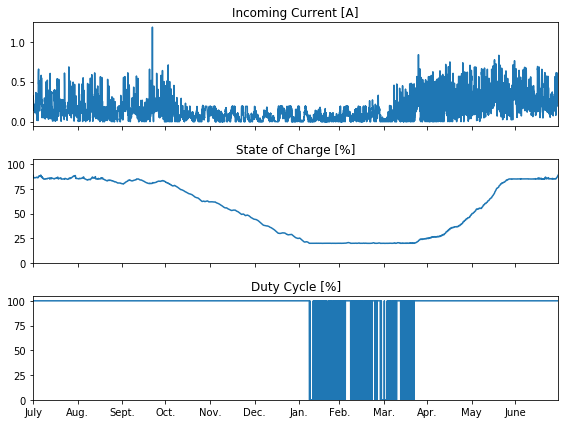

In [9]:
# Create a WeatherStation object for the Resolute data
resolute = WeatherStation('resolutedata.mat')  # Make sure that resolutedata.mat is in your project folder
resolute.simulate(0)  # Simulate using the simple algorithm

<h4>Exercise 1:&nbsp;&nbsp; Membership functions</h4>
The membership functions for state of charge and future average power are the same as last lab, and have been provided for you in the following cell.  However, the duty cycle membership functions must be defined.  This value can range from 25% to 100%.
<br>
<ol>
    <li>Define the universe of discourse for duty cycle, using 101 elements.</li>
</ol>

In [10]:
# Define membership functions for state of charge
uniSOC = np.linspace(20, 100, num = 81)
lowSOC = fuzz.trapmf(uniSOC, [20, 20, 22, 38])
mediumSOC = fuzz.trapmf(uniSOC, [22, 38, 42, 58])
highSOC = fuzz.trapmf(uniSOC, [42, 58, 100, 100])

# Define membership functions for future average power
uniP = np.linspace(0, 100, num = 101)
scarceP = fuzz.trapmf(uniP, [0, 0, 30, 35])
averageP = fuzz.trapmf(uniP, [30, 35, 40 ,45])
abundantP = fuzz.trapmf(uniP, [40, 45, 100, 100])

### WRITE CODE BELOW THIS LINE ###
uniDC = np.linspace(25, 100, num=101)
# print(uniDC)

<ol start=2>
    <li>Plot the trapezoidal membership functions, LOW, MEDIUM, and HIGH, on one figure according to the parameters given below.</li>
</ol>

\begin{array}{l c c c c}
\hline
Fuzzy\ set & a & b & c & d \\
\hline
LOW & 25 & 25 & 28.75 & 50.50 \\
MEDIUM & 28.75 & 50.50 & 52 & 74.50 \\
HIGH & 52 & 74.50 & 100 & 100\\
\hline
\end{array}

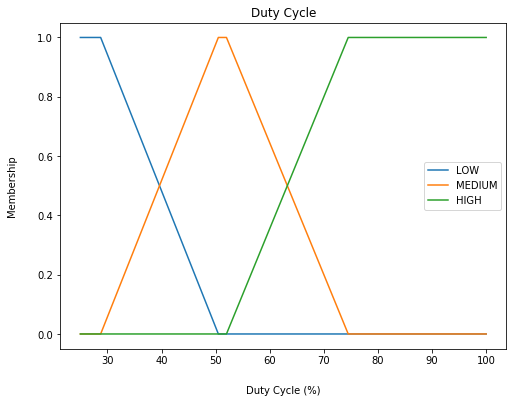

In [11]:
x = uniDC
lowDC    = fuzz.trapmf(x, [25, 25, 28.75, 50.50]);
mediumDC = fuzz.trapmf(x, [28.75, 50.50, 52, 74.50]);
highDC   = fuzz.trapmf(x, [52, 74.50, 100, 100]);

plt.title("Duty Cycle");
plt.xlabel("Duty Cycle (%)");
plt.ylabel("Membership");

plt.plot(x, lowDC, label="LOW");
plt.plot(x, mediumDC, label="MEDIUM");
plt.plot(x, highDC, label="HIGH");
plt.legend();

<h4>Exercise 2:&nbsp;&nbsp; Fuzzy lookup table</h4>
Determine the fuzzy lookup table, <i>fuzzyLookupTable</i>, that provides the values of duty cycle for each combination of state of charge and future average power.  The matrix should be of dimension $M \times N$, where $M$ is the number of elements in the state of charge universe of discourse and $N$ is the number of elements in the future average power universe of discourse.  This means that the element at $(0, 0)$ should yield the duty cycle if the state of charge were at 20% and the future average power were 0W.
<br>
The operations that are used to realize the operators in the fuzzy ruleset can be found below.  They are arranged in the order that they should be performed.

&emsp;i. <b>AND</b> - <i>Larsen</i> <br>
&emsp;ii. <b>IF/THEN</b> - <i>Larsen</i> <br>
&emsp;iii. <b>ELSE</b> - <i>maximum</i> <br>
&emsp;iv. Defuzzification - <i>bisector</i> <br>

<ol>
    <li>Once all of the elements are calculated, plot the fuzzy lookup table.</li>
</ol>

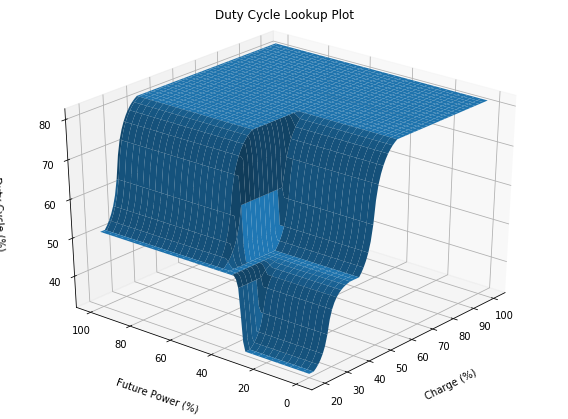

In [12]:
             # AND             THEN
# M = uniSOC.size
# N = uniP.size

fuzzyLookupTable = np.zeros((uniSOC.size, uniP.size));                        
rules = (
    (0, (lowSOC, scarceP, lowDC)),
    (1, (lowSOC, averageP, mediumDC)),
    (2, (lowSOC, abundantP, mediumDC)),
    (3, (mediumSOC, scarceP, mediumDC)),
    (4, (mediumSOC, averageP, mediumDC)),
    (5, (mediumSOC, abundantP, highDC)),
    (6, (highSOC, scarceP, highDC)),
    (7, (highSOC, averageP, highDC)),
    (8, (highSOC, abundantP, highDC)),
    
)
for s in range(uniSOC.size):
    for p in range(uniP.size):
        dutycycle = np.zeros((9, uniDC.size));
        for r, (soc, pw, dc) in rules:
            dutycycle[r] = soc[s] * pw[p] * dc
        dcMax = dutycycle[0]
        for i in range(1,9):
            dcMax = np.maximum(dcMax, dutycycle[i])
        fuzzyLookupTable[s,p] = fuzz.defuzz(uniDC, dcMax, 'bisector')
# print(fuzzyLookupTable)

fig = plt.figure()
[gX, gY] = np.meshgrid(uniSOC, uniP, indexing='ij')
ax = fig.gca(projection = '3d')
ax.plot_surface(gX, gY, fuzzyLookupTable)
ax.set_xlabel('Charge (%)')
ax.set_ylabel('Future Power (%)')
ax.set_zlabel('Duty Cycle (%)')
ax.set_title('Duty Cycle Lookup Plot\n')
ax.view_init(azim=220)

plt.tight_layout()
plt.show();


        
        

<h4>Exercise 3:&nbsp;&nbsp; Making decisions</h4>
Four monitoring stations are checked at their current states and found to have the parameters listed in the table below.

\begin{array}{c c c}
\hline
Station\ \# & State\ of\ charge\ [\%] & Future\ average\ power\ [W] \\
\hline
1       & 20\           & 100  \\
2       & 28\           & 23   \\
3       & 50\           & 21   \\
4       & 88\           & 91   \\
\hline
\end{array}

The initial code provided in the cell below rounds all duty cycle values to 25%, 50%, 75%, or 100% to make the simulation results more intuitive and easier to read.
<br>
<ol>
    <li>Determine what duty cycle each station should adopt, based on the new fuzzy lookup table, and print each result.</li>
</ol>

In [13]:
# Normalize the table, and set the duty cycle to take values of 25, 50, 75, or 100
fuzzyLookupTable -= np.amin(np.amin(fuzzyLookupTable))
fuzzyLookupTable /= np.amax(np.amax(fuzzyLookupTable))
fuzzyLookupTable = 75 * np.round(fuzzyLookupTable * 3) / 3 + 25

### WRITE CODE BELOW THIS LINE ###
stations = (
    (1, (20-20, 100)),
    (2, (28-20, 23)),
    (3, (50-20, 21)),
    (4, (88-20, 91)),
)

for i, (x, y) in stations:
    print(f"Station {i} should adopt a duty cycle of {fuzzyLookupTable[x][y]}%")
    

Station 1 should adopt a duty cycle of 50.0%
Station 2 should adopt a duty cycle of 25.0%
Station 3 should adopt a duty cycle of 75.0%
Station 4 should adopt a duty cycle of 100.0%


<h4>Exercise 4:&nbsp;&nbsp; Fuzzy simulation</h4>
Finally, run the cell below to simulate the monitoring station using the new fuzzy controller.
<br>
<ol>
    <li>Discuss any changes that were noted and how the fuzzy controller managed the station's power consumption relative to the incoming current, generated from the renewable resources.  Include the plot of your final results in the report.</li>
</ol>

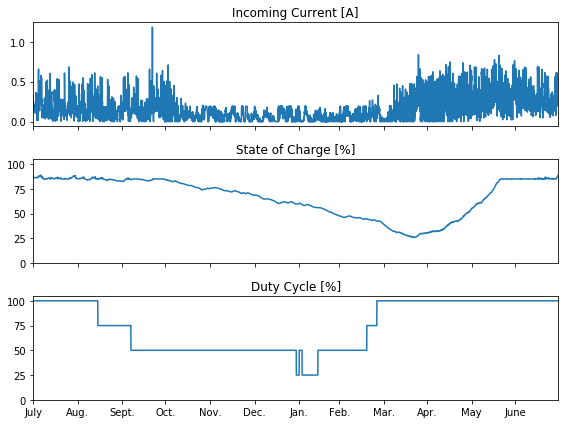

In [14]:
resolute.setFuzzyLookupTable(fuzzyLookupTable)
resolute.simulate(1)  # Simulate using the fuzzy algorithm

We can see that the fuzzy controller allows the monitoring station to better use its power. It no longer reaches a duty cycle of 0 at all.
Instead of running at a 100% duty cycle until there is no power left, the station now lowers its duty cycle starting around September to conserve charge. We then see it ramp up to a duty cycle of 100% when more power is available around March, as expected.

<hr>
<hr>

<h2>Abstract</h2>

The purpose of this lab was to to build on top of the concepts learned in the first lab, and use that knowledge to make a fuzzy controller. In this context, without a controller, a monitoring station in Resolute, Nunavut loses power (duty cycle 0%) during the winter, due to a lack of charge and less renewable resources available during the winter. The purpose of the fuzzy controller developed in this lab is to determine what duty cycle should be used, based on the current state of charge and future average power. A team of climatologists created a simulation model to calculate the current state of charge, and future average power, and came up with a fuzzy ruleset consisting of 9 IF-THEN-ELSE statements. The fuzzy controller should fix the problem of the monitoring station losing power during the winter
by adjusting the monitoring station's duty cycle (and therefore its power consumption) to better use its available resources.

<h2>Introduction</h2>

The main goal of this lab was to learn how to make a fuzzy controller. To implement a fuzzy controller, we first need some inputs. In this case, the inputs were the weather monitoring station's current state of charge, and its future average power. Luckily, these were found during the previous lab. We took every possible input, and applied a fuzzy ruleset to generate a lookup table. 
To do so, fuzzy membership functions were defined for the duty cycle as well, and a
fuzzy lookup table was created using the fuzzy rules and defuzzification. The elements were calculated using the 9 IF-THEN-ELSE statements which made up the fuzzy ruleset which we used. This was applied to every input using Larsen for AND, Larsen for IF/THEN, maximum for ELSE, and finally the bisector defuzzification method to obtain a crisp value
in a table for each input. This serves as a lookup table,
from which we can simply enter the
current state of charge, and future average power, and the table will
tell us what the duty cycle should be based on those two inputs. The generated table was also used to look at 4 monitoring stations from which we determined what duty cycle each station should adopt based on its current state of charge, and future average power.

<h2>Conclusion</h2>

In this lab, we learned how to make a fuzzy controller using a fuzzy ruleset given to us. Using two input membership functions (state of charge and future average power), and an output membership function for the duty cycle, we applied a fuzzy ruleset and defuzzifization to generate a fuzzy lookup table to look at what the controller should do
for each possible input. The lookup table was plotted to show a neat looking surface, and the table was also used to determine what duty cycle 4 different monitoring stations should adopt based on their current state of charge and future average power. This would have been extremely tedious by hand, but thanks to the power of computing, it was not too bad. 
Exercise 2 was challenging relative to the rest of this lab as we are normally used to looking at specific inputs. and evaluating the fuzzy rules against just a few inputs. In the lab, we used code to do the same, but with all possible inputs of the fuzzy membership functions to generate a lookup table. The concept itself is not hard, but getting the program to do something which you are used to doing manually, and to process not just a few inputs manually, but to
write it in a way such that it processes all the inputs required one to think in a different way from what we normally do in-class, and on assignments, even though the concepts are the same. Fuzzy controllers
seem to have a ton of useful use-cases, yet they seem as equally limited as they are powerful. They can be used for many things, like antilock braking systems, climate control, or controlling the duty cycle of a monitoring station based on current charge and future available power, yet they seem limited for more complicated things which require 'intelligence'. In conclusion, this lab solidified the concept of creating fuzzy controllers using fuzzy rulesets while building on top of the concepts learned in the previous lab.

<center>
<h3>Lab 2 Marking Guide</h3>
<hr>
</center>

\begin{array}{@{}clcc@{}}
\textbf{Exercise} & \textbf{Item}           & \textbf{Total Marks} & \textbf{Earned Marks} \\ 
\hline
                  & Pre-lab                 & 2                     &               \\ 
                  & Abstract                & 1                     &               \\ 
                  & Introduction            & 1                     &               \\
                  & Conclusion              & 2                     &               \\
1                 & Membership\ functions	& 3                     &               \\
2                 & Fuzzy\ lookup\ table    & 15                 	&               \\
3                 & Making\ decisions       & 5                 	&               \\
4                 & Fuzzy\ simulation       & 5                 	&               \\
\hline
                  & \textbf{TOTAL}          & 33                    &
\end{array}